In [6]:
from PIL import Image

# 获取原始图像
img = Image.open('/Users/finley/Projects/Stock/data/image/test.jpg')
img.show()

# 清洗：去除多余的线

# 归一化尺寸

# 二值化
img = img.convert('RGBA')
pixdata = img.load()
threshold = 150
#红色 238,73,51
#绿色 71,151,54
for y in range(img.size[1]):
  for x in range(img.size[0]):
    red_d = abs(pixdata[x,y][0] - 238) + abs(pixdata[x,y][1] - 73) + abs(pixdata[x,y][2] - 51)
    green_d = abs(pixdata[x,y][0] - 71) + abs(pixdata[x,y][1] - 151) + abs(pixdata[x,y][2] - 54)
    if red_d < threshold:
      pixdata[x, y] = (255, 255, 255)
    elif green_d < threshold:
      pixdata[x, y] = (0, 0, 0)
    else:
      pixdata[x, y] = (255, 255, 255, 0)  
img.show()

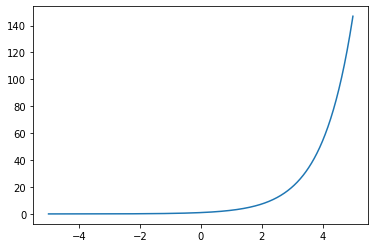

In [82]:
#测试逆函数和画图
import matplotlib.pyplot as plt
import numpy as np
import math 
from pynverse import inversefunc

exp = (lambda x: math.exp(x))
# log = (lambda x: math.log(x))
log = inversefunc(exp)
x=np.arange(-5,5,0.01)
y=[]
for value in x:
    y.append(exp(value))
plt.plot(x,y)

# x=np.arange(0.01,5,0.01)
# y=[]
# for value in x:
#     y.append(log(value))
# plt.plot(x,y)



/Users/finley/opt/anaconda3/lib/python3.9/site-packages/pynverse/inverse.py:187: RuntimeWarning: Trouble calculating inverse for values: [0.]
  warnings.warn("Trouble calculating inverse for values: "
/Users/finley/opt/anaconda3/lib/python3.9/site-packages/pynverse/inverse.py:194: RuntimeWarning: Results obtained with less than 2 decimal digits of accuracy
  warnings.warn("Results obtained with less than %g "


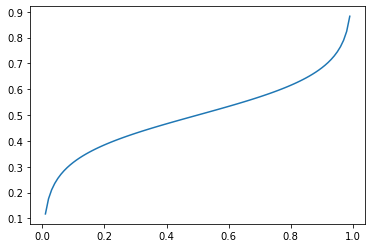

In [79]:
实现sb函数
import matplotlib.pyplot as plt
import numpy as np
import math 
from pynverse import inversefunc

alpha = 6
sb = (lambda x: 1/(1+math.exp(-2*alpha*x+alpha)))
sb_inverse = inversefunc(sb)
x=np.arange(0,1,0.01)
# y=[]
# for value in x:
#     y.append(sb(value))
# plt.plot(x,y)
# x=np.arange(0,1,0.01)
y=[]
for value in x:
    y.append(sb_inverse(value))
plt.plot(x,y)


In [5]:
#实现d函数
"""
创建和img相同尺寸的二维矩阵，k线部分标记1，背景部分标记0
mask = [[0 for i in range(3)] for j in range(3)]
遍历每一个节点，背景部分跳过，k线部分创建一个mask，判断mask里是否有背景部分像素
有：计算距离，没有：扩大mask半径
"""
import time
import math 
from PIL import Image

threshold = 150
img = Image.open('/Users/finley/Projects/Stock/data/image/test.jpg')
img = img.convert('RGBA')
pixdata = img.load()
mask = [[0 for i in range(img.size[0])] for j in range(img.size[1])]
dp = [[0 for i in range(img.size[0])] for j in range(img.size[1])]
p = [[0 for i in range(img.size[0])] for j in range(img.size[1])]
print('图像尺寸:' + str(img.size))
print('图像宽度:' + str(img.size[0]))
print('图像高度:' + str(img.size[1]))

#初始化mask矩阵
start = time.time()
for y in range(img.size[1]):
  for x in range(img.size[0]):
    red_d = abs(pixdata[x,y][0] - 238) + abs(pixdata[x,y][1] - 73) + abs(pixdata[x,y][2] - 51)
    green_d = abs(pixdata[x,y][0] - 71) + abs(pixdata[x,y][1] - 151) + abs(pixdata[x,y][2] - 54)
    if red_d < threshold or green_d < threshold:
      mask[y][x] = 1
    else:
      mask[y][x] = 0
end = time.time()
print('初始化模板矩阵耗时:' + str(end - start))

#计算dp矩阵
start = time.time()
for y in range(len(mask)):
  for x in range(len(mask[0])):
    if(mask[y][x] == 0):
        dp[y][x] = 0
    else:
        r = 1
        dis = 0
        while(dis == 0):
            for j in range(y - r, y + r):
                for i in range(x - r, x + r):
                    if (mask[j][i] == 0):
#                         d = pow(math.dist([x,y],[i,j]),2) #这里为什么要开方？
                        d = math.dist([x,y],[i,j])
                        if (dis == 0 or (dis != 0 and dis > d)):
                            dis = d
            r = r + 1
        dp[y][x] = dis   
end = time.time()
print('计算dp矩阵耗时:' + str(end - start))

#dp矩阵归一化
start = time.time()
max_dp=0
min_dp=10000000
for y in range(len(dp)):
  for x in range(len(dp[0])):
    if (dp[y][x] > 0):
        if (dp[y][x] > max_dp):
            max_dp = dp[y][x]
        if (dp[y][x] < min_dp):
            min_dp = dp[y][x]
print('最大dp值:' + str(max_dp))
print('最小dp值:' + str(min_dp))
for y in range(len(p)):
  for x in range(len(p[0])):
    if (dp[y][x] > 0):
        p[y][x] = (dp[y][x] - min_dp)/(max_dp - min_dp)
end = time.time()
print('计算归一化矩阵耗时:' + str(end - start))





图像尺寸:(1542, 764)
图像宽度:1542
图像高度:764
初始化模板矩阵耗时:1.906135082244873
计算dp矩阵耗时:33.29990220069885
最大dp值:33.24154027718932
最小dp值:1.0
计算归一化矩阵耗时:0.2749450206756592


In [ ]:
#生成cb并保存


